<a href="https://colab.research.google.com/github/SandeshBashyal/Pytorch_Offical_Tutorials/blob/main/Tutorial_MNIST_CLASSIFIER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Tutorial:


## A. Tutorial in MNIST datasets from torchvision

In [1]:
import torch
torch.__version__

'2.0.1+cu118'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


In [3]:
# import torchvision
import torchvision.datasets as datasets
from torchvision.transforms import transforms, ToTensor
mnist_train_datasets = datasets.MNIST(root = './data', train = True, download = True, transform = ToTensor())
mnist_test_datasets = datasets.MNIST(root = '.', train = False, download = True, transform = ToTensor())

root -> root directory of dataset where MNIST/raw/train-images-idx3-ubyte and MNIST/raw/t10k-images-idx3-ubyte exist.

train -> train specifies training or test dataset, that takes boolean value

download -> 

In [4]:
print(mnist_train_datasets)
print(mnist_test_datasets)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: .
    Split: Test
    StandardTransform
Transform: ToTensor()


In [5]:
# Visualization Utilities
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [6]:
torch.tensor(np.array(mnist_train_datasets[1][0])) # [0] [1] label store & [0][0], [1][0] -> image stored

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [7]:
torch.unsqueeze(torch.tensor([[0,1],[1, 2]]), axis = 1).shape

torch.Size([2, 1, 2])

[[5 0 4 1 9 2 1 3 1 4]
 [3 5 3 6 1 7 2 8 6 9]
 [4 0 9 1 1 2 4 3 2 7]
 [3 8 6 9 0 5 6 0 7 6]
 [1 8 7 9 3 9 8 5 9 3]
 [3 0 7 4 9 8 0 9 4 1]
 [4 4 6 0 4 5 6 1 0 0]
 [1 7 1 6 3 0 2 1 1 7]
 [9 0 2 6 7 8 3 9 0 4]
 [6 7 4 6 8 0 7 8 3 1]]


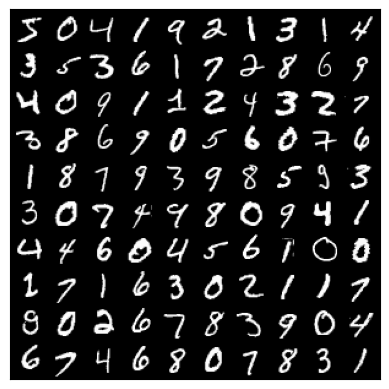

In [8]:
from functools import total_ordering
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path

total = 100
nrow = 10
num_list = []
array_list = []
for i in range(total):
  num_list.append(mnist_train_datasets[i][0])
  # num_list.append(torch.unsqueeze(torch.tensor(np.array(mnist_train_datasets[i][0])), axis = 0 ))
  array_list.append(mnist_train_datasets[i][1]) # i refers to row of images, where 1 refers to columns of labels
grid = make_grid(num_list, nrow = nrow)
show(grid)
print(np.array(array_list).reshape(nrow, int(total/nrow)))

In [9]:
from torch.utils.data import DataLoader

batch_size = 128

train_dataloader = DataLoader(mnist_train_datasets, batch_size=batch_size)
test_dataloader = DataLoader(mnist_test_datasets, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([128, 1, 28, 28])
Shape of y: torch.Size([128]) torch.int64


In [10]:
from torch import nn
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=512, bias=True)
    (7): ReLU()
    (8): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [11]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=2e-3)

In [12]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [13]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [14]:
epochs = 100
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.303058  [  128/60000]
loss: 2.303988  [12928/60000]
loss: 2.302891  [25728/60000]
loss: 2.301742  [38528/60000]
loss: 2.300720  [51328/60000]
Test Error: 
 Accuracy: 12.1%, Avg loss: 2.300927 

Epoch 2
-------------------------------
loss: 2.299702  [  128/60000]
loss: 2.302146  [12928/60000]
loss: 2.301246  [25728/60000]
loss: 2.298818  [38528/60000]
loss: 2.299400  [51328/60000]
Test Error: 
 Accuracy: 10.6%, Avg loss: 2.299014 

Epoch 3
-------------------------------
loss: 2.296499  [  128/60000]
loss: 2.300315  [12928/60000]
loss: 2.299561  [25728/60000]
loss: 2.296011  [38528/60000]
loss: 2.297956  [51328/60000]
Test Error: 
 Accuracy: 10.4%, Avg loss: 2.297044 

Epoch 4
-------------------------------
loss: 2.293369  [  128/60000]
loss: 2.298392  [12928/60000]
loss: 2.297724  [25728/60000]
loss: 2.293203  [38528/60000]
loss: 2.296290  [51328/60000]
Test Error: 
 Accuracy: 17.2%, Avg loss: 2.294912 

Epoch 5
------------------------

In [15]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [16]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [17]:
classes = [
    "0",
    "1",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
    "9",
]

model.eval()
x, y = mnist_test_datasets[0][0], mnist_test_datasets[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "7", Actual: "7"
